In [58]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#display the plots inline and ignore the warnings
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## PROBLEM 1:
### Task 1: Data Exploration and Understanding

### Dataset Overview:
1. Load the dataset and display the first 10 rows. <br>
2. Identify the number of rows and columns in the dataset. <br>
3. List all the columns and their data types.

In [59]:
# load the dataset
happiness_df = pd.read_csv("./dataset/WHR-2024-5CS037.csv")

In [60]:
# display first 10 rows
happiness_df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [61]:
# identifying number of rows and cols
rows_cols = happiness_df.shape
print("Number of rows and columns:", rows_cols)

Number of rows and columns: (143, 9)


In [62]:
# all the cols and their data types
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


### Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column. <br >
2. Identify the country with the highest and lowest happiness scores.

In [63]:
# calculating mean, median and std for score col
summary_stats = happiness_df["score"].describe()
print("The mean of score is:", summary_stats["mean"])
print("The median of score is:", summary_stats["50%"])
print("The standard deviation of score is:", summary_stats["std"])

The mean of score is: 5.52758041958042
The median of score is: 5.785
The standard deviation of score is: 1.1707165099442995


In [64]:
# country with highest and lowset score
print(
    "The country with highest score is:",
    happiness_df["Country name"][happiness_df["score"].idxmax()],
)
print(
    "The country with lowest score is:",
    happiness_df["Country name"][happiness_df["score"].idxmin()],
)

The country with highest score is: Finland
The country with lowest score is: Afghanistan


### Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [65]:
# checking for null values
happiness_df.isnull().sum()

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [66]:
# since there are null values, data imputation is necessary
happiness_df.dropna(inplace=True)

### Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5. <br>
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [67]:
# countries with score of gt 7.5
# since there exist no top ten countries with score greater than 7.5 we are taking the value as 6.5
countries = happiness_df.loc[happiness_df["score"] > 6.5]
print(
    "The countries with score greater than 7.5 are:\n",
    countries[["Country name", "score"]].head(10),
)

The countries with score greater than 7.5 are:
   Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525
3       Sweden  7.344
4       Israel  7.341
5  Netherlands  7.319
6       Norway  7.302
7   Luxembourg  7.122
8  Switzerland  7.060
9    Australia  7.057


In [68]:
# sorting the dataset by GDP percapita in descending order
countries.sort_values("Log GDP per capita", ascending=False).head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
13,Austria,6.905,1.885,1.336,0.696,0.703,0.214,0.305,1.766


### Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
<br>
Low − (Score < 4) <br>
Medium − (4 ≤ Score ≤ 6) <br>
High − (Score > 6)

In [69]:
happiness_df["Happiness Category"] = pd.cut(
    happiness_df["score"],
    bins=[0, 3, 6, float("inf")],
    labels=["Low", "Medium", "High"],
)

happiness_df["Happiness Category"].sample(10)

52       High
38       High
140    Medium
32       High
130    Medium
66     Medium
25       High
19       High
16       High
126    Medium
Name: Happiness Category, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

### Task 2:  Data Visualizations:
 -  `Bar Plot`: Plot the top 10 happiest countries by Score using a bar chart.

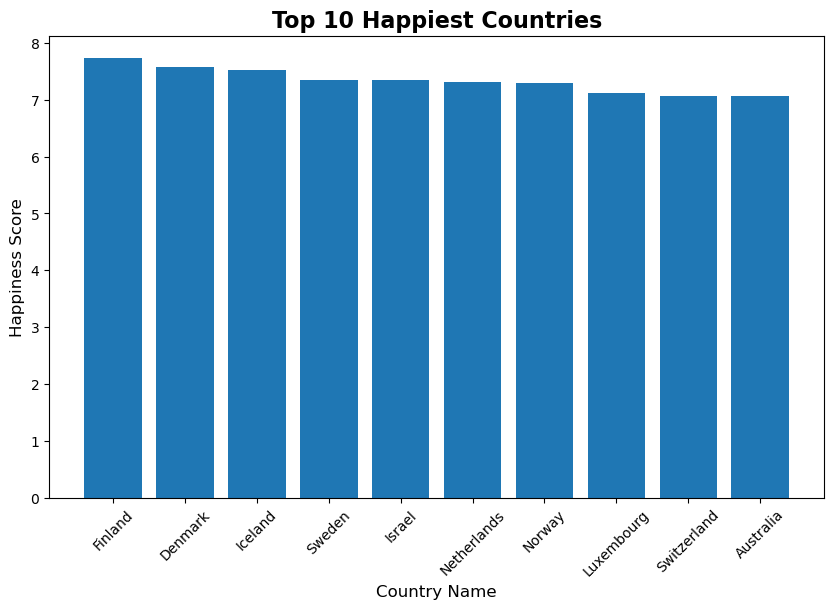

In [70]:
# plotting top 10 happiest countries
happiest_countries = happiness_df.sort_values(by="score", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(happiest_countries["Country name"], happiest_countries["score"])

plt.xlabel("Country Name", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.title("Top 10 Happiest Countries", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)

plt.show()

 - `Line Plot`: Plot the top 10 unhappiest countries by Score using a Line chart.

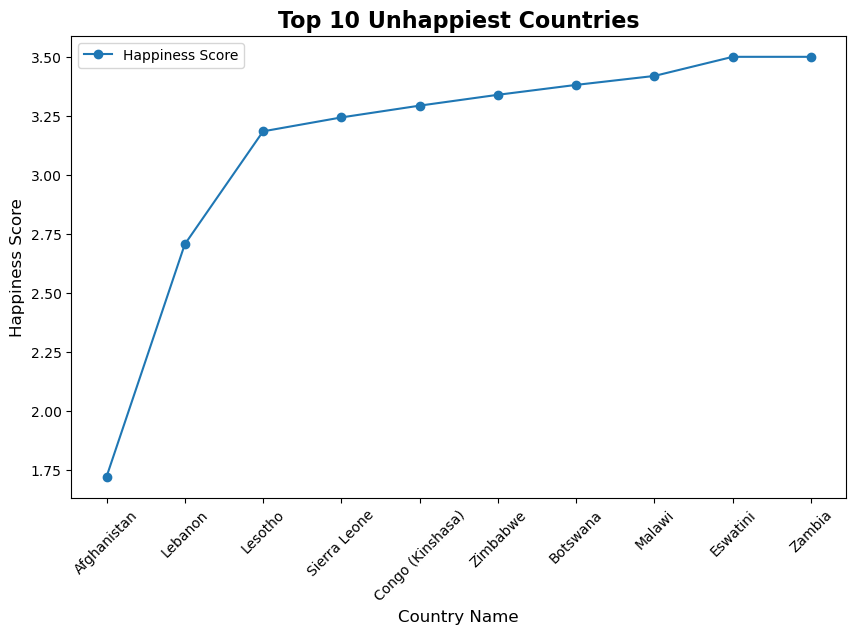

In [71]:
# plotting top 10 unhappiest countries
happiest_countries = happiness_df.sort_values(by="score", ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.plot(happiest_countries["Country name"], happiest_countries["score"], marker="o")
plt.legend(["Happiness Score"])

plt.xlabel("Country Name", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.title("Top 10 Unhappiest Countries", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)

plt.show()

- Plot a `histogram` for the Score column to show its distribution and also interpret.

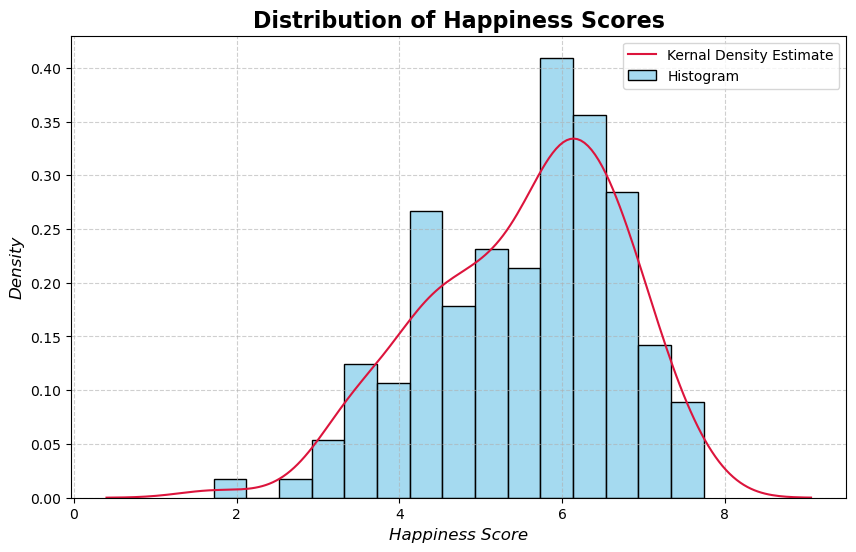

In [72]:
# distrubution plot of the score column
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=happiness_df, x="score", kde=False, stat="density", bins=15, color="skyblue"
)
sns.kdeplot(data=happiness_df, x="score", ax=ax, color="crimson")

plt.xlabel("Happiness Score", fontsize=12, fontstyle="italic")
plt.ylabel("Density", fontsize=12, fontstyle="italic")
plt.title("Distribution of Happiness Scores", fontsize=16, fontweight="bold")

plt.grid(alpha=0.6, linestyle="--")
plt.legend(["Kernal Density Estimate", "Histogram"])

plt.show()

**Interpretation of Histogram**
  The given histogram displays the distribution of happiness scores in the World Happiness Report dataset. The plot clearly shows a left-skewed distribution, as evidenced by both the histogram and the Kernel Density Estimate (KDE) line. This skewness indicates that most of the data points are concentrated on the right, with a long tail extending to the left. The peak of the distribution occurs around a happiness score of 6, suggesting that this is the most frequent value among the happiness scores (mode).

  Additionally, a few countries can be observed with happiness scores below 2 and above 7, highlighting the rarity of extremely low and high happiness scores. These outliers indicate that while most countries tend to cluster around mid-range happiness levels, there are a small number of countries with significantly lower or higher scores.

- `Scatter Plot`: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

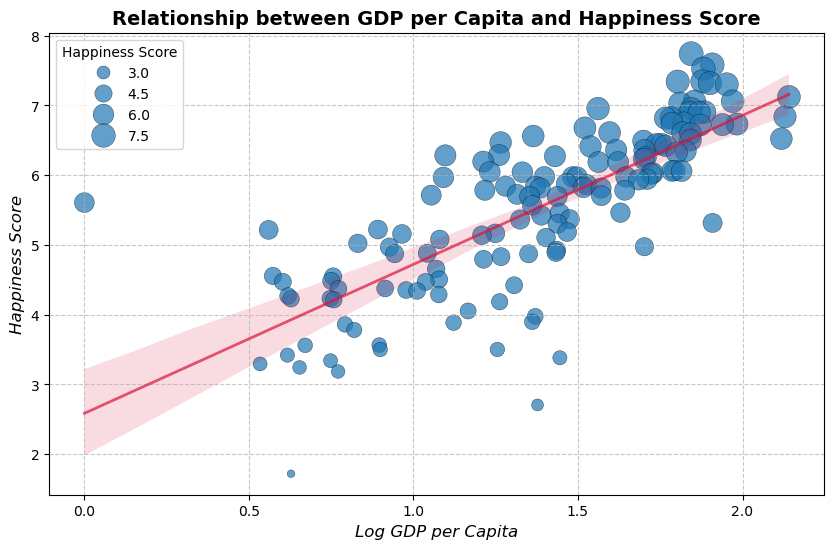

In [73]:
# Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=happiness_df,
    x="Log GDP per capita",
    y="score",
    size="score",
    sizes=(30, 300),
    edgecolor="black",
    palette="viridis",
    linewidth=0.3,
    alpha=0.7,
)

sns.regplot(
    data=happiness_df,
    x="Log GDP per capita",
    y="score",
    scatter=False,
    color="crimson",
    line_kws={"linewidth": 2, "alpha": 0.7},
)

plt.xlabel("Log GDP per Capita", fontsize=12, fontstyle="italic")
plt.ylabel("Happiness Score", fontsize=12, fontstyle="italic")
plt.title(
    "Relationship between GDP per Capita and Happiness Score",
    fontsize=14,
    fontweight="bold",
)

plt.grid(linestyle="--", alpha=0.7)
plt.legend(title="Happiness Score", loc="upper left")

plt.show()

## PROBLEM 2

### Task 1: Setup Task - Preparing the South-Asia Dataset:
1. Define the countries in South Asia with a list as given <br>
2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.} <br>
3. Save the filtered dataframe as separate CSV files for future use.

In [74]:
# list of south asian countries as given
south_asian_countries = [
    "Afghanistan",
    "Bangladesh",
    "Bhutan",
    "India",
    "Maldives",
    "Nepal",
    "Pakistan",
    "Sri Lanka",
]

# filtering the dataset
south_asian_df = happiness_df[happiness_df["Country name"].isin(south_asian_countries)]
south_asian_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Medium
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Medium


In [75]:
# saving to csv
south_asian_df.to_csv("./dataset/south_asian_happiness.csv", index=False)

In [76]:
# looking a the columns
south_asian_df.columns

Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual',
       'Happiness Category'],
      dtype='object')

### Task 2: Composite Score Ranking:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics: <br>
```Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy```
<br>
2. Rank the South Asian countries based on the Composite Score in descending order.<br>
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.<br>
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot. <br>

In [77]:
# creating a composite column
south_asian_df["Composite Score"] = (
    0.40 * south_asian_df["Log GDP per capita"]
    + 0.30 * south_asian_df["Social support"]
    + 0.30 * south_asian_df["Healthy life expectancy"]
)
south_asian_df.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Medium,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Medium,0.6774


In [78]:
# ranking South Asian countries based on the Composite Score in descending order.
ranked_df = south_asian_df.sort_values(by="Composite Score", ascending=False)
ranked_df[["Country name", "Composite Score"]]

,Country name,Composite Score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


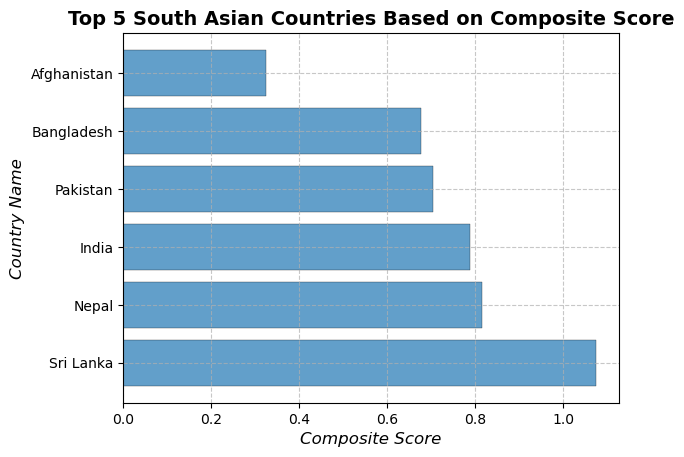

In [79]:
# visualzing top 5 south Asian countries
plt.barh(
    ranked_df["Country name"],
    ranked_df["Composite Score"],
    edgecolor="black",
    linewidth=0.3,
    alpha=0.7,
)

plt.xlabel("Composite Score", fontsize=12, fontstyle="italic")
plt.ylabel("Country Name", fontsize=12, fontstyle="italic")
plt.title(
    "Top 5 South Asian Countries Based on Composite Score",
    fontsize=14,
    fontweight="bold",
)

plt.grid(linestyle="--", alpha=0.7)

plt.show()

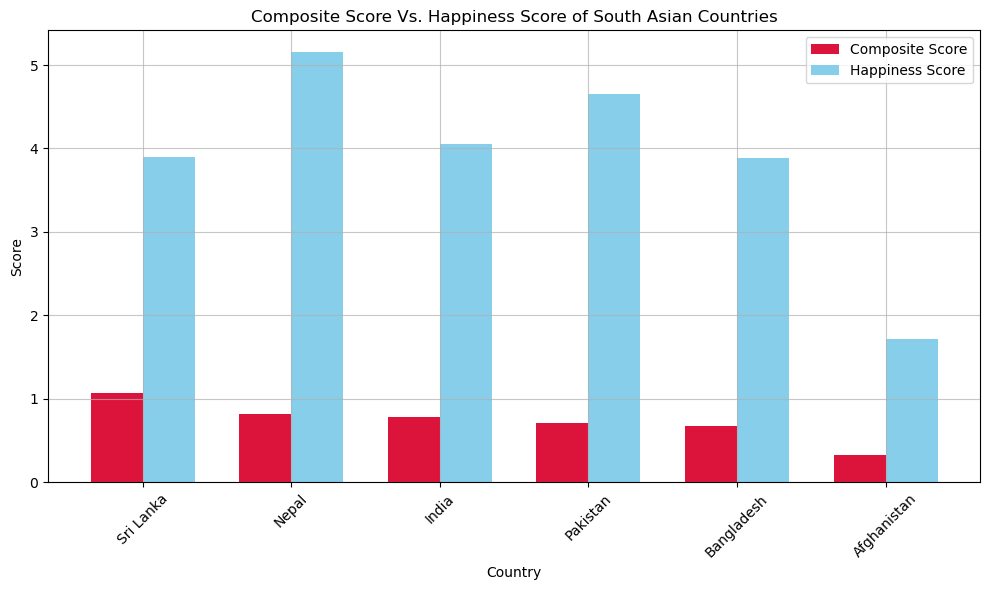

In [80]:
x = np.arange(len(ranked_df)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
ax.bar(
    x - width / 2,
    ranked_df["Composite Score"],
    width,
    label="Composite Score",
    color="crimson",
)
ax.bar(
    x + width / 2, ranked_df["score"], width, label="Happiness Score", color="skyblue"
)

ax.set_xlabel("Country")
ax.set_ylabel("Score")
ax.set_title("Composite Score Vs. Happiness Score of South Asian Countries")
ax.set_xticks(x)
ax.set_xticklabels(ranked_df["Country name"], rotation=45)
ax.legend()

plt.grid(linestyle='-', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()

**Analysis of Top 5 South Asian Countries Based on Composite Score and Happiness Score**

- From the above plots, it is evident that Nepal consistently ranks at the top in both the Happiness Score and Composite Score rankings. This indicates that Nepal performs well in terms of both objective factors (such as social, economic, and political measures) and subjective well-being (as measured by happiness).

- India, on the other hand, has maintained its third position in both rankings, indicating stable performance across the factors influencing both scores.

- In contrast, Sri Lanka shows a significant difference in its rankings. While it ranks as the top country based on the Composite Score, reflecting its strong social and economic development, it drops to one of the bottom two countries in the Happiness Score rankings. This suggests that, despite the country's development, the well-being of its citizens remains relatively low.

- Bangladesh consistently ranks at the bottom in both rankings, indicating that it faces challenges in both socio-economic development and the quality of life for its citizens.

- Meanwhile, Pakistan swaps its position from 2nd to 3rd when comparing the Composite Score and Happiness Score rankings. This suggests that while Pakistan performs relatively well in terms of subjective well-being (happiness), it lags slightly behind in the objective measures represented by the Composite Score.

- As compared to other countries on the list, Afghanistan ranks very low on both of composite and happiness score rankings indicating very poor performance on both socio-economic and well-being of citizens

### Task 3: Outlier Detection
1. Identify outlier countries in South Asia based on their Score and GDP per Capita. <br>
2. Define outliers using the 1.5 × IQR rule.<br>
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color. <br>
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [81]:
# Creating a function to calculate lower bound and upperbound
def calc_lower_upper_bound(df: pd.DataFrame, col: str) -> tuple:
    """
    Calculate the lower and upper bounds for outliers in a given column using the Interquartile Range (IQR) method.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    col (str): The name of the column (as a string) for which the bounds will be calculated.

    Returns:
    tuple: A tuple containing the lower bound and upper bound for detecting outliers.
           Values are calculated as:
           - Lower Bound = Q1 - 1.5 * IQR
           - Upper Bound = Q3 + 1.5 * IQR
           Where Q1 is the 1st quartile, Q3 is the 3rd quartile, and IQR is the Interquartile Range (Q3 - Q1).
    """
    if col not in df.columns:
        raise ValueError(f"Column {col} not found in the DataFrame.")

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return lower_bound, upper_bound

In [82]:
# for score
score_lower_bound, score_upper_bound = calc_lower_upper_bound(south_asian_df, "score")
# for gdp
gdp_lower_bound, gdp_upper_bound = calc_lower_upper_bound(
    south_asian_df, "Log GDP per capita"
)

print("Score Lower Bound:", round(score_lower_bound, 2))
print("Score Upper Bound:", round(score_upper_bound, 2))
print("GDP Lower Bound:", round(gdp_lower_bound, 2))
print("GDP Upper Bound:", round(gdp_upper_bound, 2))

Score Lower Bound: 2.96
Score Upper Bound: 5.43
GDP Lower Bound: 0.74
GDP Upper Bound: 1.4


In [83]:
# identifying outlier condition
outlier_condition = (
    (south_asian_df["score"] < score_lower_bound)
    | (south_asian_df["score"] > score_upper_bound)
    | (south_asian_df["Log GDP per capita"] < gdp_lower_bound)
    | (south_asian_df["Log GDP per capita"] > gdp_upper_bound)
)

# identify the outliers and non outliers separately
outliers = south_asian_df[outlier_condition]
non_outliers = south_asian_df[~(outlier_condition)]
print("Outliers:\n", outliers["Country name"])
print("\nNon Outliers:\n", non_outliers["Country name"])

Outliers:
 142    Afghanistan
Name: Country name, dtype: object

Non Outliers:
 92          Nepal
107      Pakistan
125         India
127     Sri Lanka
128    Bangladesh
Name: Country name, dtype: object


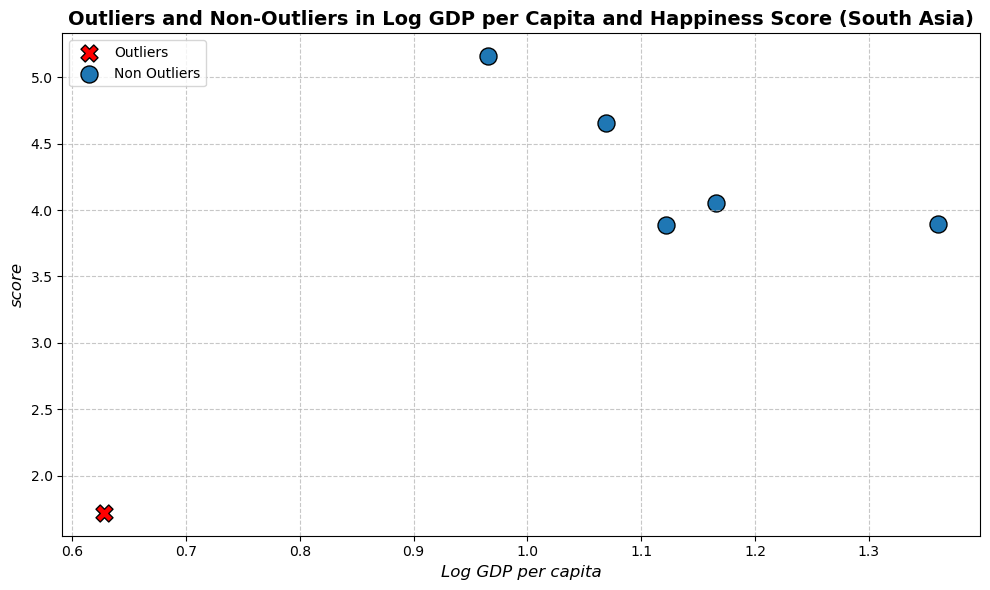

In [84]:
# creating a scatter plot

# for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=outliers,
    x="Log GDP per capita",
    y="score",
    edgecolor="black",
    palette="viridis",
    s=150,
    color="red",
    marker="X",
)

# for non outliers
sns.scatterplot(
    data=non_outliers,
    x="Log GDP per capita",
    y="score",
    s=150,
    edgecolor="black",
    palette="viridis",
    markers="o",
)

plt.title(
    "Outliers and Non-Outliers in Log GDP per Capita and Happiness Score (South Asia)", fontsize=14, fontweight="bold"
)
plt.xlabel("Log GDP per capita", fontsize=12, fontstyle="italic")
plt.ylabel("score", fontsize=12, fontstyle="italic")
plt.legend(["Outliers", "Non Outliers"], loc="upper left")

plt.grid(linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

**Characteristics of these outliers and their potential impact on regional averages**

  Outliers in any dataset can significantly affect statistical measures, including averages, medians, and other summary statistics. As observed through the Interquartile Range (IQR) method, Afghanistan exhibits extreme values among South Asian countries in the dataset, particularly based on LogGDP per capita and the score gap. These extreme values can have a substantial impact when calculating the regional average for South Asian countries, as they can skew or pull the average towards them.


### Task  4: Exploring Trends Across Metrics:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries. <br>
2. Create scatter plots with trendlines for these metrics against the Score. <br>
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries. <br>

In [85]:
# checking the dtypes of cols
south_asian_df.dtypes

Country name                      object
score                            float64
Log GDP per capita               float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
Dystopia + residual              float64
Happiness Category              category
Composite Score                  float64
dtype: object

In [86]:
# selecting only the numerical cols to calculate the correlation
numerical_cols = south_asian_df.select_dtypes(include='Float64')
correlations = numerical_cols.corrwith(south_asian_df['score'])
correlations

score                           1.000000
Log GDP per capita              0.583969
Social support                  0.697434
Healthy life expectancy         0.461544
Freedom to make life choices    0.800519
Generosity                      0.874512
Perceptions of corruption       0.102148
Dystopia + residual             0.556231
Composite Score                 0.684388
dtype: float64

In [87]:
# finding the relation in Freedom to make life choices and the score
genorisity_relation = south_asian_df["Generosity"].corr(
    south_asian_df["score"]
)
genorisity_relation

0.874512371253192

In [88]:
# finding relation in Perception of corruption  and score
perc_of_corruption_relation = south_asian_df["Perceptions of corruption"].corr(south_asian_df["score"])
perc_of_corruption_relation

0.10214790200478509

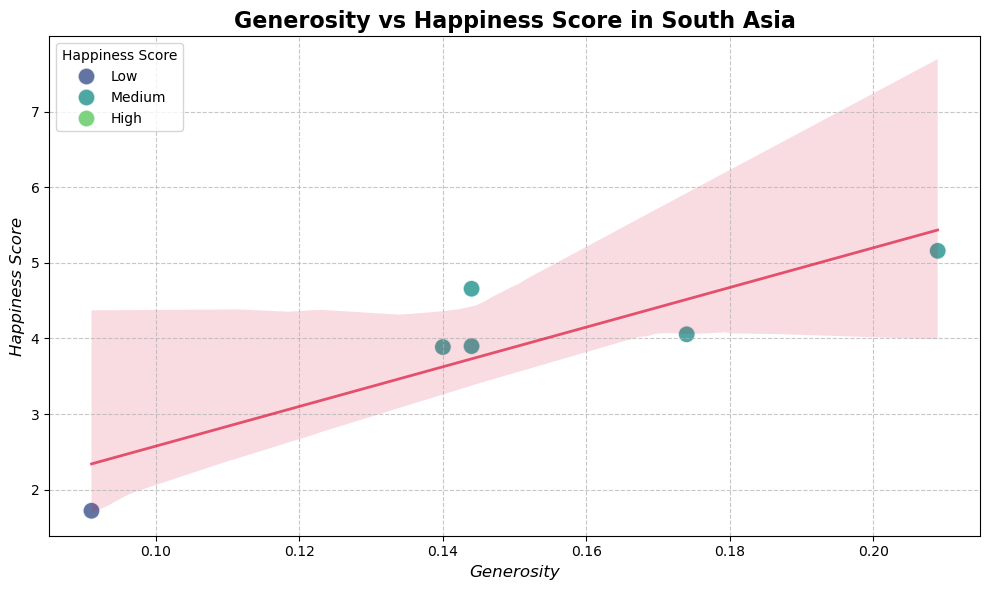

In [89]:
# analysing the trend with scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=south_asian_df,
    x="Generosity",
    y="score",
    hue="Happiness Category",
    palette="viridis",
    s=150,
    alpha=0.8,
)

sns.regplot(
    data=south_asian_df,
    x="Generosity",
    y="score",
    scatter=False,
    color="crimson",
    line_kws={"linewidth": 2, "alpha": 0.7},
)

plt.title(
    "Generosity vs Happiness Score in South Asia",
    fontsize=16,
    fontweight="bold",
)

plt.xlabel("Generosity", fontsize=12, fontstyle="italic")
plt.ylabel("Happiness Score", fontsize=12, fontstyle="italic")

plt.legend(title="Happiness Score", loc="upper left")

plt.tight_layout()
plt.grid(linestyle="--", alpha=0.7)
plt.show()

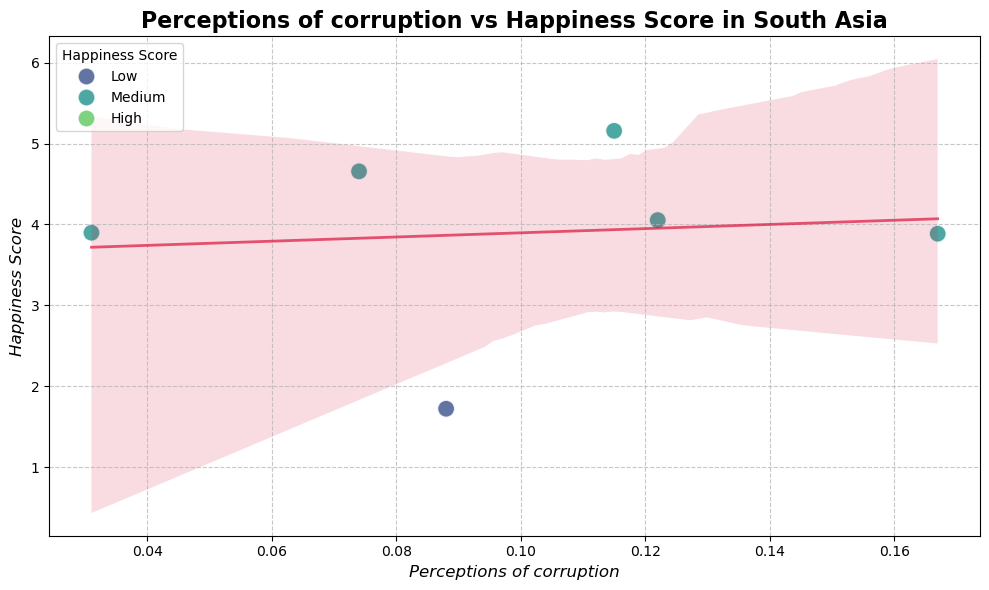

In [90]:
# analysing the genorisity vs happiness score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=south_asian_df,
    x="Perceptions of corruption",
    y="score",
    hue="Happiness Category",
    palette="viridis",
    s=150,
    alpha=0.8,
)

sns.regplot(
    data=south_asian_df,
    x="Perceptions of corruption",
    y="score",
    scatter=False,
    color="crimson",
    line_kws={"linewidth": 2, "alpha": 0.7},
)

plt.title(
    "Perceptions of corruption vs Happiness Score in South Asia",
    fontsize=16,
    fontweight="bold",
)
plt.xlabel("Perceptions of corruption", fontsize=12, fontstyle="italic")
plt.ylabel("Happiness Score", fontsize=12, fontstyle="italic")
plt.legend(title="Happiness Score", loc="upper left")

plt.tight_layout()
plt.grid(linestyle="--", alpha=0.7)
plt.show()

**Interpretation of the above graphs and analysis of strongest and weakest correlation***

- `Genorisity and Happiness Score` - `0.87`
  - Correlation coefficient of 0.87 indicates a highly strong linear relationship between the happiness score and genorisity in people. This indicates countries having higher levels of generosity often report higher happiness score.
  - Genorisity in people fosters a sense of belonging and emotional satisfaction contributing to overall happiness of people.
  - The relationship can also be observed and proved through the plots given.

- `Perceptions of corruption and Happiness score` - `0.10`

  - Correlation coefficient of 0.10 indicates a weak positive relationship between the happiness score and perception of corruption.
  - This implies that higher perception of corruption doesn't necessarily impact the happiness score.  
  - The weak relationship can also be observed through the plots.

### Task 5: Gap Analysis:

1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country. <br>
2. Rank the South Asian countries by this gap in both ascending and descending order. <br>
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart. <br>
4. Analyze the reasons behind these gaps and their implications for South Asian countries.<br>


In [91]:
# Task - 5 - Gap Analysis
south_asian_df["GDP-Score Gap"] = (
    south_asian_df["score"] - south_asian_df["Log GDP per capita"]
)
south_asian_df[["Country name", "score", "Log GDP per capita", "GDP-Score Gap"]]

,Country name,score,Log GDP per capita,GDP-Score Gap
92,Nepal,5.158,0.965,4.193
107,Pakistan,4.657,1.069,3.588
125,India,4.054,1.166,2.888
127,Sri Lanka,3.898,1.361,2.537
128,Bangladesh,3.886,1.122,2.764
142,Afghanistan,1.721,0.628,1.093


In [92]:
# arranging the countries in descending order of GDP-Score Gap
descending_df = south_asian_df.sort_values(by="GDP-Score Gap", ascending=False)
descending_df[["Country name", "score", "Log GDP per capita", "GDP-Score Gap"]].head()

,Country name,score,Log GDP per capita,GDP-Score Gap
92,Nepal,5.158,0.965,4.193
107,Pakistan,4.657,1.069,3.588
125,India,4.054,1.166,2.888
128,Bangladesh,3.886,1.122,2.764
127,Sri Lanka,3.898,1.361,2.537


In [93]:
# arranging the countries in ascending order of GDP-Score Gap
ascending_df = south_asian_df.sort_values(by="GDP-Score Gap", ascending=True)
ascending_df[["Country name", "score", "Log GDP per capita", "GDP-Score Gap"]].head()

,Country name,score,Log GDP per capita,GDP-Score Gap
142,Afghanistan,1.721,0.628,1.093
127,Sri Lanka,3.898,1.361,2.537
128,Bangladesh,3.886,1.122,2.764
125,India,4.054,1.166,2.888
107,Pakistan,4.657,1.069,3.588


In [94]:
# Top 3 countries with largest positive and negative gaps
top_3_positive = descending_df.head(3)
top_3_negative = ascending_df.head(3)
print("Top 3 countries with largest positive GDP-Score Gap:")
print(top_3_positive[["Country name", "score", "Log GDP per capita", "GDP-Score Gap"]])
print("\nTop 3 countries with largest negative GDP-Score Gap:")
print(top_3_negative[["Country name", "score", "Log GDP per capita", "GDP-Score Gap"]])

Top 3 countries with largest positive GDP-Score Gap:
    Country name  score  Log GDP per capita  GDP-Score Gap
92         Nepal  5.158               0.965          4.193
107     Pakistan  4.657               1.069          3.588
125        India  4.054               1.166          2.888

Top 3 countries with largest negative GDP-Score Gap:
    Country name  score  Log GDP per capita  GDP-Score Gap
142  Afghanistan  1.721               0.628          1.093
127    Sri Lanka  3.898               1.361          2.537
128   Bangladesh  3.886               1.122          2.764


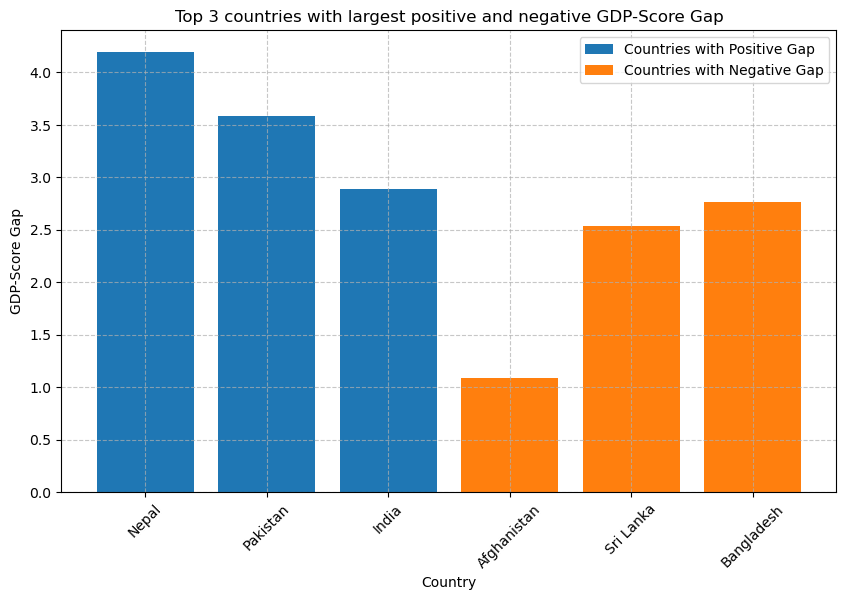

In [95]:
# Plotting the barchart
plt.figure(figsize=(10, 6))
plt.bar(top_3_positive["Country name"], top_3_positive["GDP-Score Gap"])
plt.bar(top_3_negative["Country name"], top_3_negative["GDP-Score Gap"])
plt.xlabel("Country")
plt.ylabel("GDP-Score Gap")

plt.title("Top 3 countries with largest positive and negative GDP-Score Gap")
plt.legend(["Countries with Positive Gap", "Countries with Negative Gap"])
plt.grid(linestyle="--", alpha=0.7)

plt.xticks(rotation=45)
plt.show()

**Reasons behind the gap includes**

Observations from the data and plot suggests that even with higher GDP per capita countries like Nepal, Pakistan and India have lower happiness score. This may be due to the political instability, unequal distribution of resources, less effective policy implementation and many more reasons within these countries. Contrarily countries like Afghanistan, Sri Lanka and Bangladesh exibits higher happiness score even with lower GDP per capita suggesting that happiness is not only dependent on GDP of a country but also is influenced by strong social relations, communities, cultural resilience and more 

## PROBLEM 3: Comparative Analysis

### Task 1: Setup Task - Preparing the Middle Eastern Dataset

Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the given list.


In [96]:
# 3.3 Problem - 3 - Comparative Analysis

middle_east_countries = [
    "Bahrain",
    "Iran",
    "Iraq",
    "Israel",
    "Jordan",
    "Kuwait",
    "Lebanon",
    "Oman",
    "Palestine",
    "Qatar",
    "Saudi Arabia",
    "Syria",
    "United Arab Emirates",
    "Yemen",
]

middle_east_df = happiness_df[
    happiness_df["Country name"].isin(middle_east_countries)
].reset_index(drop=True)
middle_east_df["Country name"].head(10)

0                  Israel
1                  Kuwait
2    United Arab Emirates
3            Saudi Arabia
4                    Iraq
5                    Iran
6                  Jordan
7                   Yemen
8                 Lebanon
Name: Country name, dtype: object

### 1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East. <br>
• Which region has higher happiness Scores on average? <br>

In [97]:
# Descriptive statistics
stats_middle_east = middle_east_df.describe()
stats_south_asia = south_asian_df.describe()

# Mean and std of happiness score of Middle East countries
print(
    "Mean happiness score of Middle East countries:",
    round(stats_middle_east["score"]["mean"], 2),
)

print(
    "Standard deviation of happiness score of Middle East countries:",
    round(stats_middle_east["score"]["std"], 2),
)

Mean happiness score of Middle East countries: 5.35
Standard deviation of happiness score of Middle East countries: 1.65


In [98]:
# Mean and std of happiness score of South Asian countries
print(
    "Mean happiness score of South Asian countries:",
    round(stats_south_asia["score"]["mean"], 2),
)

print(
    "Standard deviation of happiness score of South Asian countries:",
    round(stats_south_asia["score"]["std"], 2),
)

Mean happiness score of South Asian countries: 3.9
Standard deviation of happiness score of South Asian countries: 1.18


In [99]:
# Calculating the higher happiness score region on average
if stats_middle_east["score"]["mean"] > stats_south_asia["score"]["mean"]:
    print("Middle East has higher happiness score on average.")
else:
    print("South Asia has higher happiness score on average.")

Middle East has higher happiness score on average.


- Answer: Based on the above results, it can be concluded that people in  middle east live happier life as compared to south asian people

### 2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score. <br>
• Plot bar charts comparing these charts. <br>

In [100]:
# Top and bottom performers
top_three_middle_east = middle_east_df.sort_values(by="score", ascending=False).head(3)
bottom_three_middle_east = middle_east_df.sort_values(by="score", ascending=True).head(
    3
)

# Results for Middle East
print("Top 3 performers in Middle East based on happiness score:")
print(top_three_middle_east[["Country name", "score"]])

print("\nBottom 3 performers in Middle East based on happiness score:")
print(bottom_three_middle_east[["Country name", "score"]])

Top 3 performers in Middle East based on happiness score:
           Country name  score
0                Israel  7.341
1                Kuwait  6.951
2  United Arab Emirates  6.733

Bottom 3 performers in Middle East based on happiness score:
  Country name  score
8      Lebanon  2.707
7        Yemen  3.561
6       Jordan  4.186


In [101]:
# Top and bottom performers for South Asia
top_three_south_asian = south_asian_df.sort_values(by="score", ascending=False).head(3)
bottom_three_south_asian = south_asian_df.sort_values(by="score", ascending=True).head(
    3
)

print("\nTop 3 performers in South Asia based on happiness score:")
print(top_three_south_asian[["Country name", "score"]])

print("\nBottom 3 performers in South Asia based on happiness score:")
print(bottom_three_south_asian[["Country name", "score"]])


Top 3 performers in South Asia based on happiness score:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 performers in South Asia based on happiness score:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898


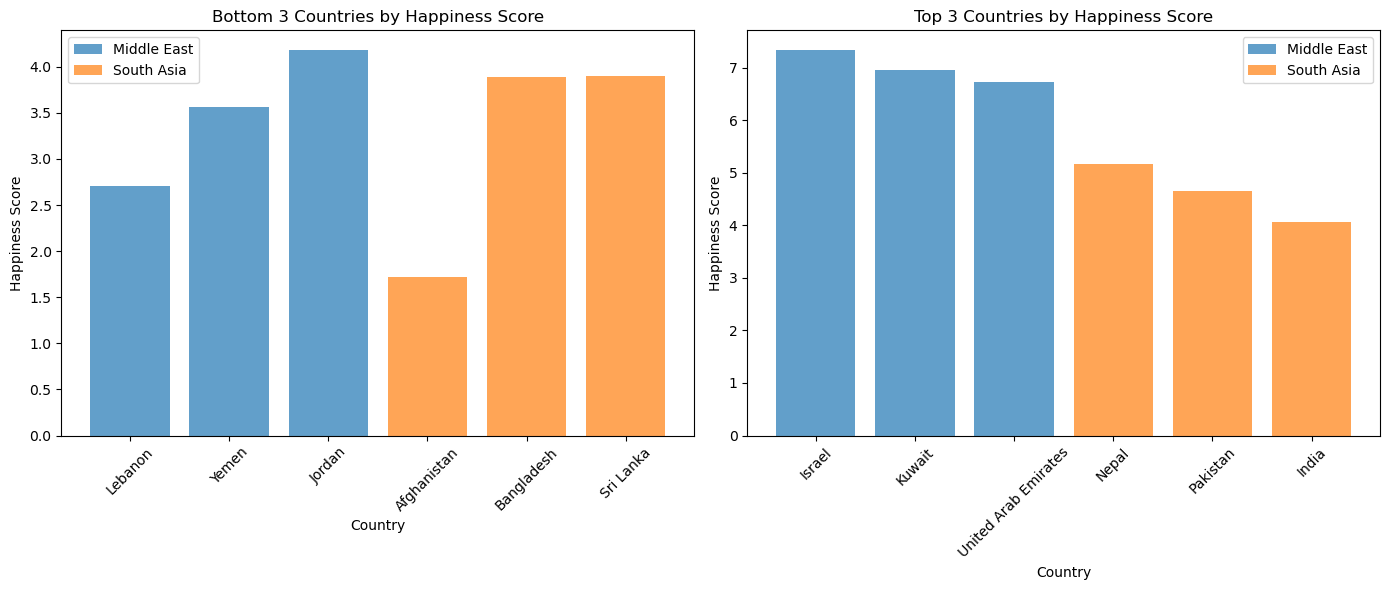

In [102]:
bottom_3_combined = pd.concat([bottom_three_middle_east.assign(Region="Middle East"), bottom_three_south_asian.assign(Region="South Asia")])
top_3_combined = pd.concat([top_three_middle_east.assign(Region="Middle East"), top_three_south_asian.assign(Region="South Asia")])

# Bottom 3 Countries 
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for region, group in bottom_3_combined.groupby("Region"):
    plt.bar(group["Country name"], group["score"], label=region, alpha=0.7)
plt.title("Bottom 3 Countries by Happiness Score")
plt.ylabel("Happiness Score")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend()

# Top 3 Countries 
plt.subplot(1, 2, 2)
for region, group in top_3_combined.groupby("Region"):
    plt.bar(group["Country name"], group["score"], label=region, alpha=0.7)
plt.title("Top 3 Countries by Happiness Score")
plt.ylabel("Happiness Score")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### 3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts. <br>
• Which metrics show the largest disparity between the two regions?

In [103]:
# Adding regions for easy identification
middle_east_df["Region"] = "Middle East"
south_asian_df["Region"] = "South Asia"

# combining the dataframes
combined_df = pd.concat([middle_east_df, south_asian_df], ignore_index=True)

# melting to long format for easier plotting
melted_df = pd.melt(
    combined_df,
    id_vars=["Country name", "Region"],
    value_vars=[
        "Log GDP per capita",
        "Social support",
        "Healthy life expectancy",
    ],
    var_name="Metric",
    value_name="Value",
)

melted_df.sample(5)

,Country name,Region,Metric,Value
9,Nepal,South Asia,Log GDP per capita,0.965
41,India,South Asia,Healthy life expectancy,0.417
29,Afghanistan,South Asia,Social support,0.000
21,Jordan,Middle East,Social support,0.983
30,Israel,Middle East,Healthy life expectancy,0.740


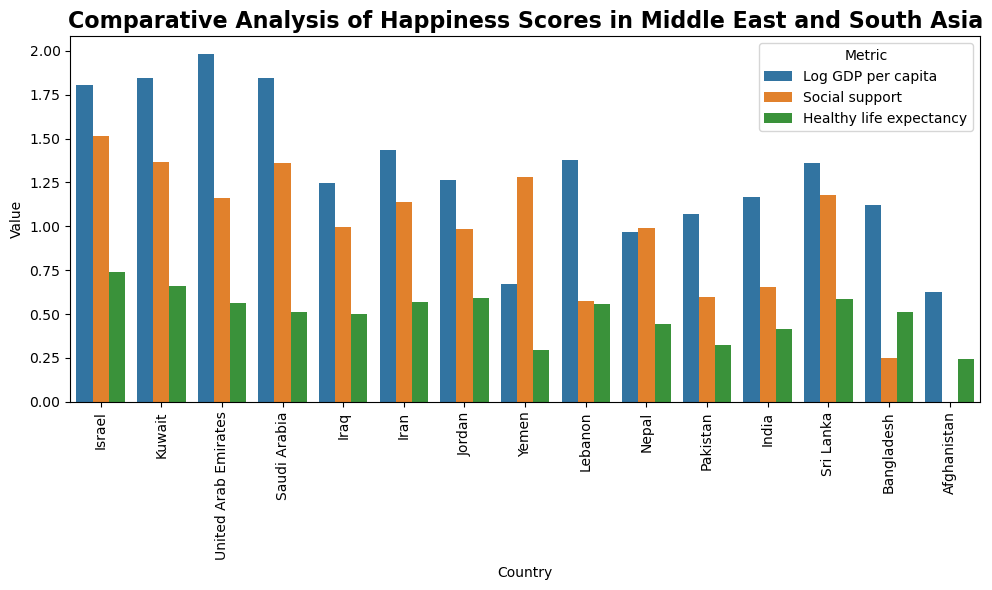

In [104]:
# using grouped bar charts to compare the performance of countries in Middle East and South Asia
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x="Country name", y="Value", hue="Metric")

plt.xlabel("Country")
plt.ylabel("Value")
plt.title(
    "Comparative Analysis of Happiness Scores in Middle East and South Asia",
    fontsize=16,
    fontweight="bold",
)
plt.xticks(rotation=90)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

***Largest Disparity Observed between the metric***

- According to the plot, the metrics with the largest disparities across the countries include Log GDP per capita, followed by Social Support, and then Life Expectancy. This suggests the gap in socio-economic factors, such as wealth, social stability, and healthcare access,  between the countries of two distinct regions.

### 4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions. <br>
• Which region has greater variability in happiness?

In [105]:
# Happiness disparity
# Calculating range (min - max) and coefficient of variation (CV)

# For south asia
range_south_asia = south_asian_df["score"].max() - south_asian_df["score"].min()
cv_south_asia = south_asian_df["score"].std() / south_asian_df["score"].mean()

print("Happiness disparity in South Asia:", round(range_south_asia, 2))
print("Coefficient of variation in South Asia:", round(cv_south_asia, 2))

Happiness disparity in South Asia: 3.44
Coefficient of variation in South Asia: 0.3


In [106]:
# For middle east
range_middle_east = middle_east_df["score"].max() - middle_east_df["score"].min()
cv_middle_east = middle_east_df["score"].std() / middle_east_df["score"].mean()

print("Happiness disparity in Middle East:", round(range_middle_east, 2))
print("Coefficient of variation in Middle East:", round(cv_middle_east, 2))

Happiness disparity in Middle East: 4.63
Coefficient of variation in Middle East: 0.31


- Answer: From the above observation, we can say that south asian countries have slightly lesser variability of 0.3 as compared to middle east having a coefficient of variation of 0.31.

### 5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region. <br>
• Create scatter plots to visualize and interpret the relationships.

In [107]:
# Corelation analysis of score with other matrices
corr_table = combined_df.groupby("Region")[
    [
        "score",
        "Log GDP per capita",
        "Social support",
        "Healthy life expectancy",
        "Freedom to make life choices",
        "Generosity",
    ]
].corr()

# taking out only the correlation with the score
score_corr = corr_table.loc[:, "score"]
print("Corelation Analysis of Score with Other Matrices: ")
score_corr

Corelation Analysis of Score with Other Matrices: 


Region                                   
Middle East  score                           1.000000
             Log GDP per capita              0.802638
             Social support                  0.778130
             Healthy life expectancy         0.566094
             Freedom to make life choices    0.863220
             Generosity                      0.627524
South Asia   score                           1.000000
             Log GDP per capita              0.583969
             Social support                  0.697434
             Healthy life expectancy         0.461544
             Freedom to make life choices    0.800519
             Generosity                      0.874512
Name: score, dtype: float64

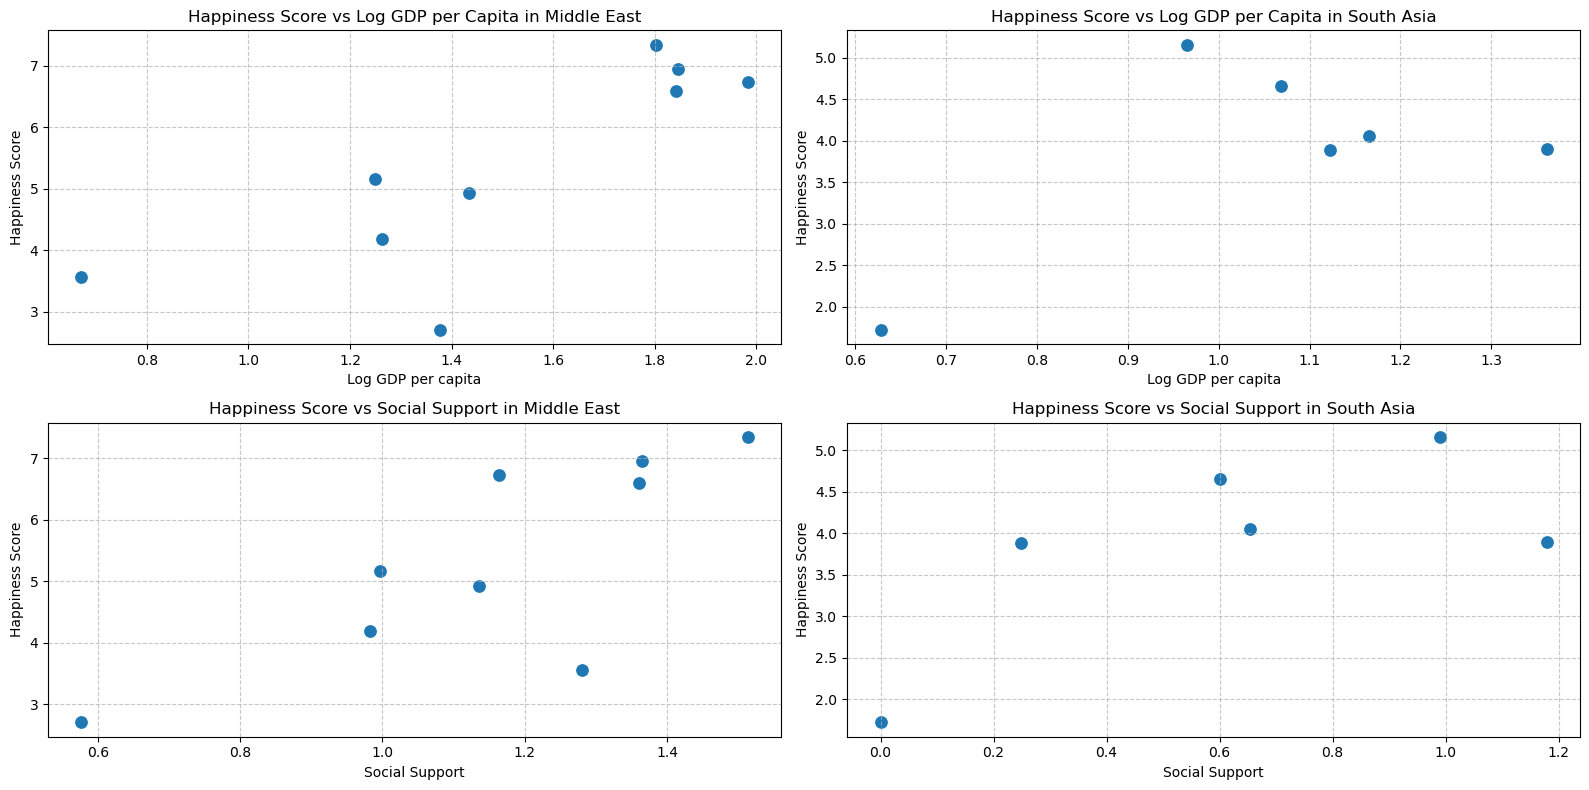

In [108]:
# Comparing Happiness Score with Log GDP per Capita and Social Support of middle east and south asia
unique_regions = combined_df["Region"].unique()

plt.figure(figsize=(16, 8))
for i, unique_region in enumerate(unique_regions, start=1):
    region_data = combined_df[combined_df["Region"] == unique_region]

    plt.subplot(2, len(unique_regions), i)
    sns.scatterplot(data=region_data, x="Log GDP per capita", y="score", s=100)
    plt.xlabel("Log GDP per capita")
    plt.ylabel("Happiness Score")
    plt.grid(linestyle="--", alpha=0.7)
    plt.title(f"Happiness Score vs Log GDP per Capita in {unique_region}")

    plt.subplot(2, len(unique_regions), i + len(unique_regions))
    sns.scatterplot(data=region_data, x="Social support", y="score", s=100)
    plt.xlabel("Social Support")
    plt.ylabel("Happiness Score")
    plt.grid(linestyle="--", alpha=0.7)
    plt.title(f"Happiness Score vs Social Support in {unique_region}")


plt.tight_layout()
plt.show()

**Interpretation of the scatter plots**

From the scatter plots, a positive correlation is observed between happiness scores and both Log GDP per capita and social support, indicating that higher GDP and social support tend to correspond with higher happiness. Outliers are visible, particularly in the Log GDP vs. happiness plot of South Asia, where a country with low GDP and happiness stands out in the bottom-left. In the Middle East plot, most points cluster on the right, but an outlier in the lower-left suggests an exception to the trend.

### 6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita. <br>
• Plot these outliers and discuss their implications.

In [109]:
# calculating lower and upper bound for south asia region for score and gdp
lower_bound_score_sa, upper_bound_score_sa = calc_lower_upper_bound(
    south_asian_df, "score"
)
lower_bound_gdp_sa, upper_bound_gdp_sa = calc_lower_upper_bound(
    south_asian_df, "Log GDP per capita"
)

In [110]:
# Detecting outliers in the south_asian_df on score and gdp col
outlier_condition_sa = (
    (south_asian_df["score"] > upper_bound_score_sa)
    | (south_asian_df["Log GDP per capita"] > upper_bound_gdp_sa)
    | (south_asian_df["score"] < lower_bound_gdp_sa)
    | (south_asian_df["Log GDP per capita"] < lower_bound_gdp_sa)
)

outliers_sa = south_asian_df[outlier_condition_sa]
non_outliers_sa = south_asian_df[~(outlier_condition_sa)]

print("Outlier countries in South Asia inlcude: \n", outliers_sa["Country name"])
print(
    "\nNon - Outlier countries in South Asia include: \n",
    non_outliers_sa["Country name"],
)

Outlier countries in South Asia inlcude: 
 142    Afghanistan
Name: Country name, dtype: object

Non - Outlier countries in South Asia include: 
 92          Nepal
107      Pakistan
125         India
127     Sri Lanka
128    Bangladesh
Name: Country name, dtype: object


In [111]:
# calculating lower and upper bound for middle east region for score and gdp
lower_bound_score_me, upper_bound_score_me = calc_lower_upper_bound(
    middle_east_df, "score"
)
lower_bound_gdp_me, upper_bound_gdp_me = calc_lower_upper_bound(
    middle_east_df, "Log GDP per capita"
)

In [112]:
# Outliers and non outliers for middle east
outlier_condition_me = (
    (middle_east_df["score"] > upper_bound_score_me)
    | (middle_east_df["Log GDP per capita"] > upper_bound_gdp_me)
    | (middle_east_df["score"] < lower_bound_gdp_me)
    | (middle_east_df["Log GDP per capita"] < lower_bound_gdp_me)
)

outliers_me = middle_east_df[outlier_condition_me]
non_outliers_me = middle_east_df[~(outlier_condition_me)]

print("Outlier countries in Middle East inlcude: \n", outliers_me["Country name"])
print(
    "\nNon - Outlier countries in Middle East include: \n",
    non_outliers_me["Country name"],
)

Outlier countries in Middle East inlcude: 
 Series([], Name: Country name, dtype: object)

Non - Outlier countries in Middle East include: 
 0                  Israel
1                  Kuwait
2    United Arab Emirates
3            Saudi Arabia
4                    Iraq
5                    Iran
6                  Jordan
7                   Yemen
8                 Lebanon
Name: Country name, dtype: object


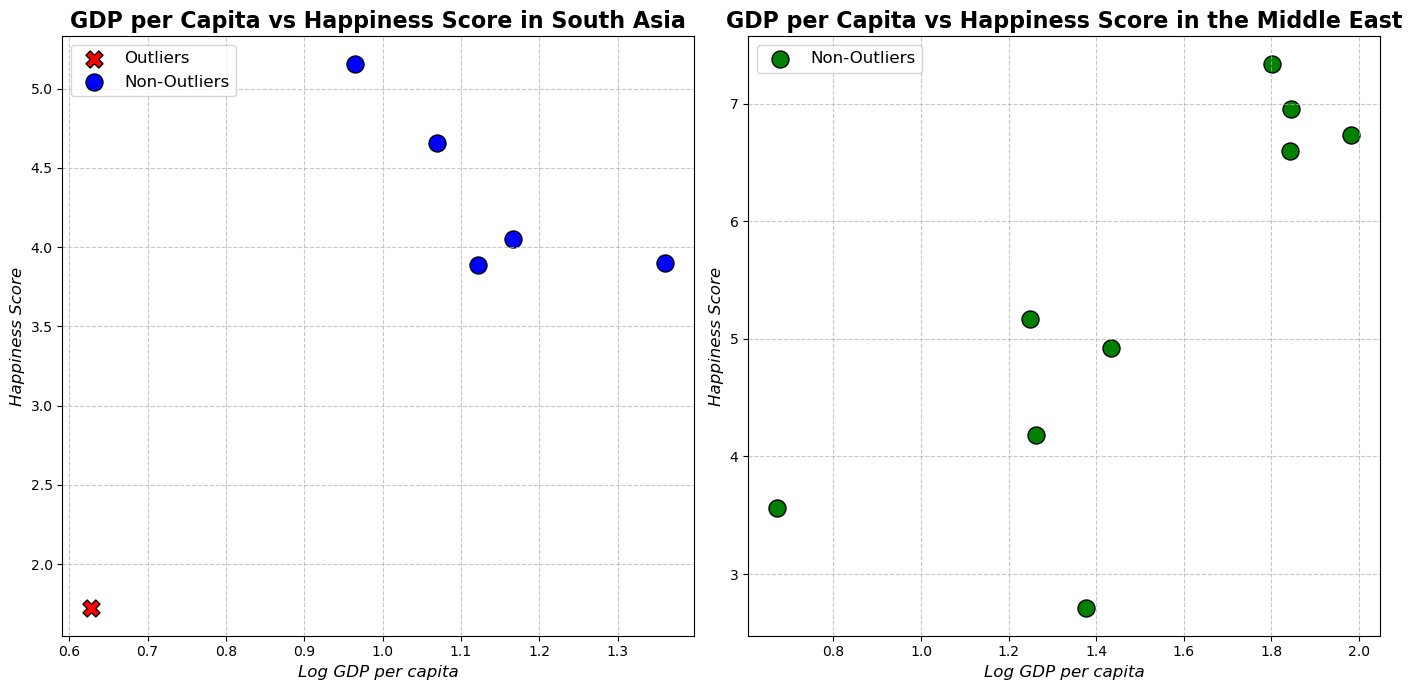

In [113]:
# Plotting the outliers and non outliers in graph
plt.figure(figsize=(14, 7))

# First Subplot: South Asia
plt.subplot(1, 2, 1)

# for south asian countries
# Outliers
sns.scatterplot(
    data=outliers_sa,
    x="Log GDP per capita",
    y="score",
    edgecolor="black",
    color="red",
    s=150,
    marker="X",
    label="Outliers",
)

# Non-Outliers
sns.scatterplot(
    data=non_outliers_sa,
    x="Log GDP per capita",
    y="score",
    edgecolor="black",
    color="blue",
    s=150,
    marker="o",
    label="Non-Outliers",
)

plt.title(
    "GDP per Capita vs Happiness Score in South Asia", fontsize=16, fontweight="bold"
)
plt.xlabel("Log GDP per capita", fontsize=12, fontstyle="italic")
plt.ylabel("Happiness Score", fontsize=12, fontstyle="italic")
plt.legend(loc="upper left", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)

# for middle east region
# outliers
sns.scatterplot(
    data=outliers_me,
    x="Log GDP per capita",
    y="score",
    edgecolor="black",
    color="red",
    s=150,
    marker="X",
    label="Outliers",
)

# non outliers
sns.scatterplot(
    data=non_outliers_me,
    x="Log GDP per capita",
    y="score",
    edgecolor="black",
    color="green",
    s=150,
    marker="o",
    label="Non-Outliers",
)

plt.title(
    "GDP per Capita vs Happiness Score in the Middle East",
    fontsize=16,
    fontweight="bold",
)
plt.xlabel("Log GDP per capita", fontsize=12, fontstyle="italic")
plt.ylabel("Happiness Score", fontsize=12, fontstyle="italic")
plt.legend(loc="upper left", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

From the above plots of outliers and non-outliers on south-asian and middle-east region, on the basis of happiness score and log GDP percapita as provided in the dataset, following observations can be concluded

- Middle East Region

  - There exist no outlier in this dataset, meaning any statistical measure (e.g mean, median, etc) calculated for this dataset would be unaffected by the extreme values (outliers) and robust statistical analysis could be assured.

- South asian Region

  - There exist one outlier in the dataset of south asian countries, found through the method of IQR. This suggests that any statistical measure calculated for this dataset is affected by the extreme value (outlier) and thus it must be handled gracefully for a robust statistical analysis.


### 7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East. <br>
• Interpret the key differences in distribution shapes, medians, and outliers.


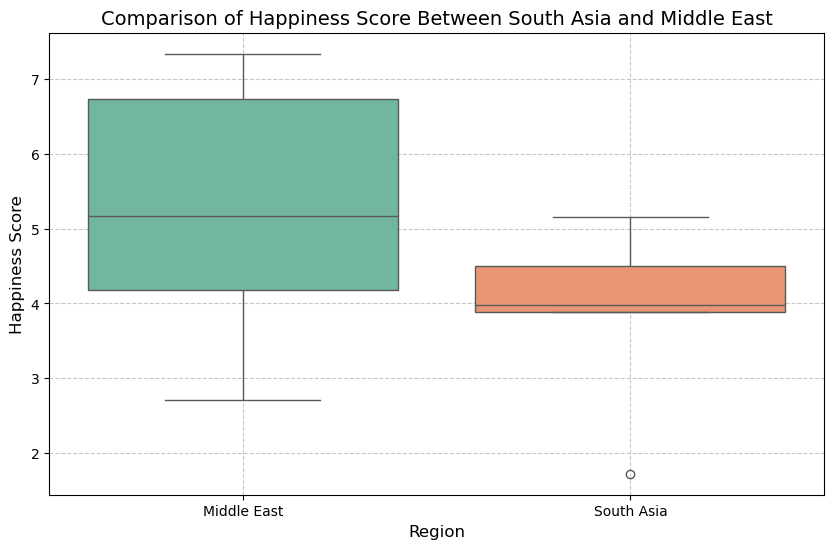

In [114]:
# 7. Visualization
# creating box plot
plt.figure(figsize=(10, 6))

regions_score_df = combined_df[["Region", "score"]]

sns.boxplot(data=regions_score_df, x="Region", y="score", palette="Set2")

# Add title and labels
plt.title(
    "Comparison of Happiness Score Between South Asia and Middle East", fontsize=14
)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)

# Show the plot
plt.show()

**Interpretation of boxplot**

From the observations, following things can be concluded:
- **Shape** : The Middle East shows a wider and more spread-out distribution, indicating significant variability in happiness scores while South Asia has a more compact distribution, with scores clustered closer to the median, reflecting less variability.
- **Median**: The Middle East has a higher median score, indicating a generally higher level of happiness across the region where as South Asia exhibits a lower median score, reflecting uniformly lower happiness levels.
- **Outlier** : The Middle East does not have notable outliers, but its lower scores (e.g., 2.7) suggest a small number of countries lagging far behind. South Asia, on the other hand has an extreme low score of 1.7, which could be considered an outlier and highlights significant challenges in parts of the region.
- **Range** : The Middle East has a much wider range, reflecting greater disparities in happiness levels while South Asia has a narrower range , suggesting more uniform but lower happiness scores.
